<a href="https://colab.research.google.com/github/neemomo/Codestates_Project1/blob/main/n221-decision-trees/n221a-decision-trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 2 / NOTE 1*

# 📝 Assignment
---

# Decision Trees(결정트리)

## 캐글 인클래스(InClass) Competitions

### 1) 대회 참여(Join) 및 데이터셋 준비

- [캐글 계정을 만드세요](https://www.kaggle.com/), 공유된 인클래스 대회 url을 통해 이동한 후 대회에 참여하세요.
- H1N1 데이터를 훈련/검증/테스트 셋으로 나누어 준비하세요
- **(Urclass Quiz) 훈련데이터셋을 사용해 H1N1 타겟으로 기준모델을 설정하세요. 기준모델의 정확도를 제출하세요.**
    1. 0.24
    2. 0.50
    3. 0.76
    4. 1


In [12]:
!pip install pandas_profiling==2.8.0

In [13]:
!pip show pandas_profiling

Name: pandas-profiling
Version: 2.8.0
Summary: Generate profile report for pandas DataFrame
Home-page: https://github.com/pandas-profiling/pandas-profiling
Author: Simon Brugman
Author-email: pandasprofiling@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: requests, pandas, confuse, astropy, htmlmin, numpy, tangled-up-in-unicode, jinja2, scipy, matplotlib, phik, visions, ipywidgets, missingno, tqdm, joblib
Required-by: 


In [9]:
!pip show pandas

Name: pandas
Version: 1.3.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, pytz, python-dateutil
Required-by: xarray, visions, vega-datasets, statsmodels, sklearn-pandas, seaborn, pymc3, plotnine, phik, pandas-profiling, pandas-gbq, pandas-datareader, mlxtend, mizani, holoviews, gspread-dataframe, google-colab, fix-yahoo-finance, fbprophet, fastai, cufflinks, cmdstanpy, arviz, altair


In [15]:
!pip uninstall pandas

Found existing installation: pandas 1.3.5
Uninstalling pandas-1.3.5:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas-1.3.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas/*
Proceed (y/n)? y
  Successfully uninstalled pandas-1.3.5


In [17]:
!pip install pandas==1.2

     |████████████████████████████████| 9.9 MB 3.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.


In [2]:
!pip install markupsafe==2.0.1

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [77]:
!pip install category-encoders

     |████████████████████████████████| 86 kB 2.9 MB/s 


In [123]:
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

from google.colab import files

In [3]:
for i in range(4):
    f = files.upload()

Saving submission.csv to submission.csv


Saving test.csv to test.csv


Saving train_labels.csv to train_labels.csv


Saving train.csv to train.csv


In [56]:
submission = pd.read_csv('/content/submission.csv')
X_test = pd.read_csv('/content/test.csv')
y_train = pd.read_csv('/content/train_labels.csv')
X_train = pd.read_csv('/content/train.csv')

In [57]:
X_train.shape, y_train.shape, X_test.shape, submission.shape

((42154, 38), (42154, 2), (28104, 38), (28104, 2))

In [58]:
target = 'vacc_h1n1_f'
targets = y_train.columns

y_train[target].value_counts()

0    32077
1    10077
Name: vacc_h1n1_f, dtype: int64

In [59]:
y_baseline = [0] * y_train.shape[0]

accuracy_score(y_train[target], y_baseline)

0.7609479527446981

### 2) 데이터 EDA 및 특성공학 수행
- profiling을 사용하여 데이터를 살펴보고, missing value, zeros, cardinarity 등을 확인하여 처리하세요.
- 본인만의 특성공학을 수행하세요.


In [7]:
X_train.profile_report()

Summarize dataset:   0%|          | 0/52 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [60]:
train = pd.concat([X_train, y_train], axis = 1)
train

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,census_msa,n_adult_r,household_children,n_people_r,employment_industry,employment_occupation,hhs_region,state,vacc_h1n1_f,vacc_seas_f
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,"MSA, Not Principle City",2.0,3.0,5.0,NaN,NaN,9,CALIFORNIA,0,0
1,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,"MSA, Principle City",1.0,0.0,1.0,Accommodation and Food Services Industries,Food Preparation and Serving Related Occupations,7,NEBRASKA,0,0
2,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"MSA, Not Principle City",1.0,2.0,3.0,Transportation and Warehousing Industries,Transportation and Material Moving Occupations,1,MASSACHUSETTS,0,0
3,2.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,"MSA, Not Principle City",2.0,2.0,4.0,"Professional, Scientific, and Technical Servic...",Legal Occupations,6,LOUISIANA,0,1
4,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,"MSA, Not Principle City",3.0,0.0,3.0,Education Services Industries,Office and Administrative Support Occupations,4,ALABAMA,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42149,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"MSA, Principle City",2.0,1.0,3.0,NaN,NaN,6,TEXAS,1,1
42150,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,"MSA, Principle City",2.0,0.0,2.0,Health Care and Social Assistance Industries,Healthcare Practitioners and Technical Occupat...,3,VIRGINIA,0,1
42151,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,"MSA, Principle City",2.0,3.0,5.0,Retail Trade Industries,Office and Administrative Support Occupations,4,TENNESSEE,0,0
42152,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,NaN,...,Non-MSA,2.0,0.0,2.0,Health Care and Social Assistance Industries,Healthcare Practitioners and Technical Occupat...,4,GEORGIA,0,1


In [62]:
train['missing_num'] = X_train.isna().sum(axis = 1)

train['missing_num'].value_counts().sort_index()

0     9321
1     6698
2     8158
3     6571
4      492
5      849
6       85
7      469
8       49
9       97
10     201
11      67
12      95
13      84
14      56
15      39
16     146
17      22
18     144
19      34
20      35
21      22
22    4461
23    3757
24     135
25      32
26       1
27      34
Name: missing_num, dtype: int64

In [39]:
### 중간에 설문 양식이 한 번 바뀐듯?
### 첨에 설문 하다가 feature 개수 부족하다 해서 22개 더 늘린거 같은데

### 일단 결측치 3개 이하인 행만 남겨보자
### 그리고 나서 최빈값? 정도로 채우면 될듯

In [64]:
train = train[train['missing_num'] <= 3]

train

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,n_adult_r,household_children,n_people_r,employment_industry,employment_occupation,hhs_region,state,vacc_h1n1_f,vacc_seas_f,missing_num
1,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,Accommodation and Food Services Industries,Food Preparation and Serving Related Occupations,7,NEBRASKA,0,0,1
2,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,2.0,3.0,Transportation and Warehousing Industries,Transportation and Material Moving Occupations,1,MASSACHUSETTS,0,0,1
3,2.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,2.0,4.0,"Professional, Scientific, and Technical Servic...",Legal Occupations,6,LOUISIANA,0,1,0
4,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,3.0,0.0,3.0,Education Services Industries,Office and Administrative Support Occupations,4,ALABAMA,1,0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,2.0,1.0,3.0,Other Services (except Public),Not ascertained,8,MONTANA,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42146,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,0.0,2.0,Administrative and Support and Waste Management,Sales and Related Occupations,8,UTAH,0,0,1
42147,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,Wholesale Trade Industries,Business and Financial Operations Occupations,6,TEXAS,0,0,1
42150,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2.0,0.0,2.0,Health Care and Social Assistance Industries,Healthcare Practitioners and Technical Occupat...,3,VIRGINIA,0,1,0
42151,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,2.0,3.0,5.0,Retail Trade Industries,Office and Administrative Support Occupations,4,TENNESSEE,0,0,0



### 3) 모델링 수행
- 결정트리를 학습시킵니다. 하이퍼파라미터를 수정하여 성능을 높여보세요. 과적합을 주의하세요!
- 검증세트 스코어를 확인하세요.(평가지표는 F1-score입니다, 수식은 캐글 Overview-Evaluation 페이지를 확인해 주세요. 평가지표에 대한 내용은 다음에 자세히 배우고 활용할 것입니다 지금은 스코어를 올리기 위한 노력을 전혀 기울이지 말고 결정트리의 개념과 코드이해, 사용에 집중하세요!)
- 특성중요도를 그래프로 나타내 보세요
- **(Urclass Quiz) 검증세트의 F1-score를 제출하세요. (0.5 이상 통과)**

In [69]:
X_train = train.drop(columns = ['missing_num']).drop(columns = targets)

X_train

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_status,census_region,census_msa,n_adult_r,household_children,n_people_r,employment_industry,employment_occupation,hhs_region,state
0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Employed,2,"MSA, Principle City",1.0,0.0,1.0,Accommodation and Food Services Industries,Food Preparation and Serving Related Occupations,7,NEBRASKA
1,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Employed,1,"MSA, Not Principle City",1.0,2.0,3.0,Transportation and Warehousing Industries,Transportation and Material Moving Occupations,1,MASSACHUSETTS
2,2.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,Employed,3,"MSA, Not Principle City",2.0,2.0,4.0,"Professional, Scientific, and Technical Servic...",Legal Occupations,6,LOUISIANA
3,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Employed,3,"MSA, Not Principle City",3.0,0.0,3.0,Education Services Industries,Office and Administrative Support Occupations,4,ALABAMA
4,3.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Employed,4,"MSA, Principle City",2.0,1.0,3.0,Other Services (except Public),Not ascertained,8,MONTANA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30743,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,Employed,4,Non-MSA,2.0,0.0,2.0,Administrative and Support and Waste Management,Sales and Related Occupations,8,UTAH
30744,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Employed,3,"MSA, Not Principle City",1.0,0.0,1.0,Wholesale Trade Industries,Business and Financial Operations Occupations,6,TEXAS
30745,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Employed,3,"MSA, Principle City",2.0,0.0,2.0,Health Care and Social Assistance Industries,Healthcare Practitioners and Technical Occupat...,3,VIRGINIA
30746,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Employed,3,"MSA, Principle City",2.0,3.0,5.0,Retail Trade Industries,Office and Administrative Support Occupations,4,TENNESSEE


In [72]:
y_train = train.loc[:, [target]]
y_train

,vacc_h1n1_f
0,0
1,0
2,0
3,1
4,0
...,...
30743,0
30744,0
30745,0
30746,0


In [73]:
random_state = 42
train_size = 0.75

X_train, X_validation = train_test_split(X_train, train_size = train_size, random_state = random_state)
y_train, y_validation = train_test_split(y_train, train_size = train_size, random_state = random_state)

In [74]:
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape

((23061, 38), (7687, 38), (23061, 1), (7687, 1))

In [89]:
y_train['vacc_h1n1_f'].unique()

array([1, 0], dtype=object)

In [99]:
y_train.dtypes

vacc_h1n1_f    object
dtype: object

In [102]:
y_train = y_train.astype(int)

In [105]:
y_validation = y_validation.astype(int)

In [126]:
for depth in range(1, 50):
    pipe = make_pipeline(
        OneHotEncoder(use_cat_names = True),
        SimpleImputer(strategy = 'most_frequent'),
        DecisionTreeClassifier(max_depth = depth, criterion = 'entropy')
    )

    pipe.fit(X_train, y_train)

    print('max_depth:', depth)
    print('훈련 정확도:', pipe.score(X_train, y_train))
    print('검증 정확도:', pipe.score(X_validation, y_validation))
    print('검증 f1:', f1_score(pipe.predict(X_validation), y_validation))
    print()

max_depth: 1
훈련 정확도: 0.7936776375699233
검증 정확도: 0.7999219461428385
검증 f1: 0.5279312461632902

max_depth: 2
훈련 정확도: 0.8139282771779194
검증 정확도: 0.8219071159099779
검증 f1: 0.42016094875052945

max_depth: 3
훈련 정확도: 0.8155327175751268
검증 정확도: 0.8247690906725641
검증 f1: 0.47197177577420624

max_depth: 4
훈련 정확도: 0.824465547894714
검증 정확도: 0.8317939378170938
검증 f1: 0.5521302390024246

max_depth: 5
훈련 정확도: 0.8266770738476216
검증 정확도: 0.837127618056459
검증 f1: 0.5342261904761905

max_depth: 6
훈련 정확도: 0.8307965829755865
검증 정확도: 0.8327045661506439
검증 f1: 0.5436479772888573

max_depth: 7
훈련 정확도: 0.8369108017865661
검증 정확도: 0.8307532197216079
검증 f1: 0.5502938126512271

max_depth: 8
훈련 정확도: 0.8422444820259313
검증 정확도: 0.8285416937687003
검증 f1: 0.5319602272727273

max_depth: 9
훈련 정확도: 0.8480551580590607
검증 정확도: 0.8294523221022505
검증 f1: 0.5452653485952134

max_depth: 10
훈련 정확도: 0.8568578986167122
검증 정확도: 0.818915051385456
검증 f1: 0.5035663338088445

max_depth: 11
훈련 정확도: 0.8637960192532848
검증 정확도: 0.818784961

### 4) 테스트셋 예측 결과 제출(Submission)

- 테스트셋에 대한 예측 결과를 캐글에 제출 하세요.(스코어가 많이 낮게 나와도 결정트리를 잘 이해하고 결과를 내었다면 충분합니다!)
- **(Urclass Quiz) 캐글 Leaderboard의 본인 Score를 제출하세요.**
 

In [143]:
best_depth = 8

_pipe = make_pipeline(
        OneHotEncoder(use_cat_names = True),
        SimpleImputer(strategy = 'most_frequent'),
        DecisionTreeClassifier(max_depth = best_depth, criterion = 'entropy')
    )

_pipe.fit(X_train, y_train)

print('max_depth:', best_depth)
print('훈련 정확도:', _pipe.score(X_train, y_train))
print('검증 정확도:', _pipe.score(X_validation, y_validation))
print('검증 f1:', f1_score(_pipe.predict(X_validation), y_validation))

max_depth: 8
훈련 정확도: 0.8422444820259313
검증 정확도: 0.8286717835306361
검증 f1: 0.5321492007104796


In [125]:
f1_score(pipe.predict(X_validation), y_validation)

0.5441645973749557

In [118]:
pipe.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [144]:
submission['vacc_h1n1_f'] = _pipe.predict(X_test)

In [145]:
submission

,Id,vacc_h1n1_f
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
28099,28099,0
28100,28100,0
28101,28101,0
28102,28102,0


In [147]:
submission.to_csv('first.csv', index = False)

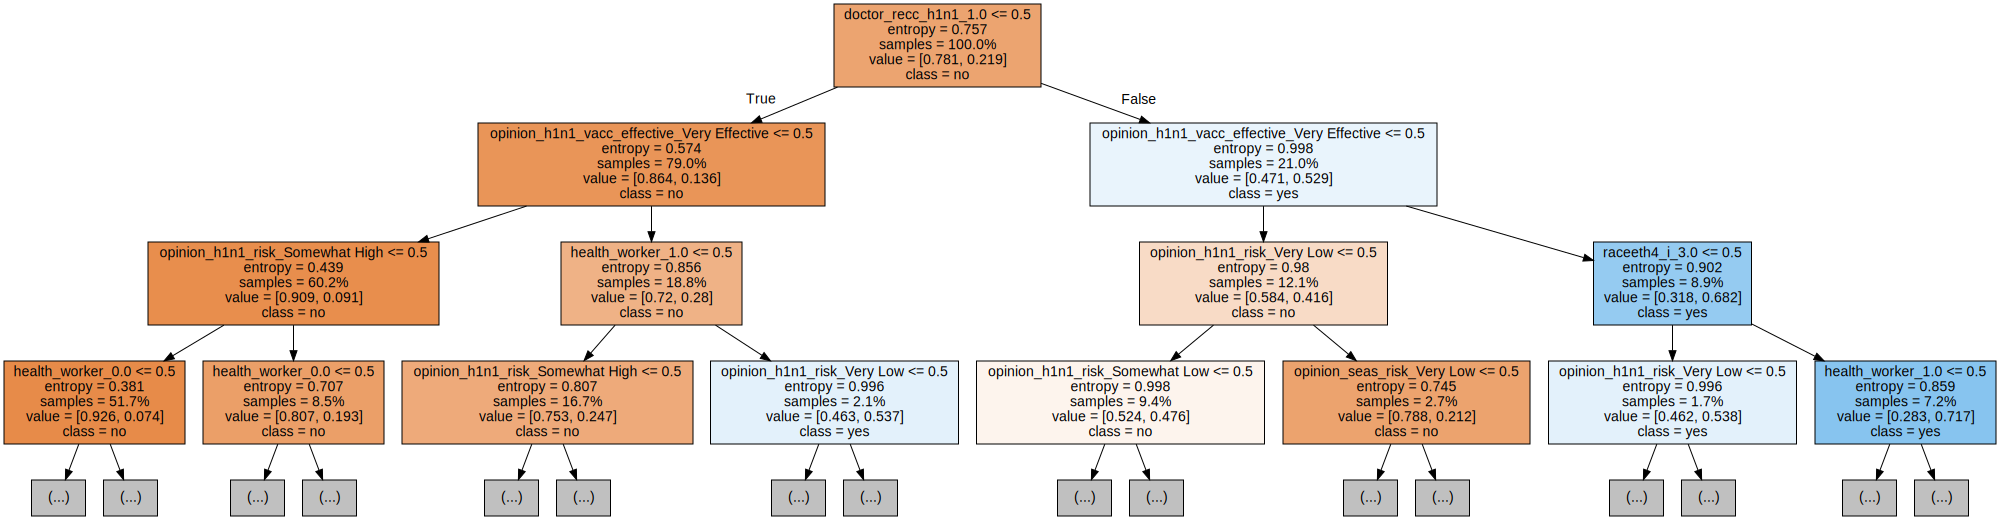

In [149]:
import graphviz
from sklearn.tree import export_graphviz

model_dt = _pipe.named_steps['decisiontreeclassifier']
enc = _pipe.named_steps['onehotencoder']
encoded_columns = enc.transform(X_validation).columns

dot_data = export_graphviz(model_dt
                           , max_depth = 3
                           , feature_names = encoded_columns
                           , class_names = ['no', 'yes']
                           , filled = True
                           , proportion = True)

display(graphviz.Source(dot_data))

## 🔥 도전과제(Github - Discussion)

### 4) 2개 이상의 imputer를 사용해 각각 특성-타겟 관계 그래프를 그려 공유하고 다음 질문에 대해 서로 논의해 보세요. 
- scikit-learn imputer([scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html))
- seaborn plots 사용하여 관심있는 특성들과 target간의 관계를 그래프로 나타내 보세요.
- 사용하신 imputer는 각각 어떤 장단점을 갖고 있으며 어떤 상황에서 사용하면 좋을까요? 
- 만드신 특성-타겟 관계 그래프에서 차이점이 있다면 무엇이고, 왜 그런 차이가 발생했다고 생각하시나요? 
- [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html)
- [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html)

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###